# 0.0 IMPORTS

In [49]:
import math
import pandas as pd
import numpy as np
import inflection

import seaborn as sns
import matplotlib.pyplot as plt

## 0.1 Helper Functions

## 0.2 Loading Data

In [2]:
df_sales_raw = pd.read_csv('train.csv', low_memory=False)
df_store_raw = pd.read_csv('store.csv', low_memory=False)

#merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

# 1.0. Data Description

## 0.1 Looking at the columns names

In [3]:
#Fazendo uma cópia do dataset para a próxima seção,
#para que nao seja necessario rodar todo o script novamente, no caso de sobre-escrever a variável por exemplo.

df1 = df_raw.copy()

In [4]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1 Rename Columns

In [5]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
            'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
            'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore (x)

cols_new = list(map (snakecase, cols_old))

#rename
df1.columns = cols_new
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Data Dimension

In [6]:
print('Number of Rows: {}'.format(df1.shape[0]) )
print('Number of Columns: {}'.format(df1.shape[1]) )

Number of Rows: 1017209
Number of Columns: 18


## 1.3 Data Types

In [7]:
df1.dtypes

#Precisamos alterar a coluna 'date' para formato de DATA (dia/mes/ano)

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [8]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

#Coluna alterada. Agora aparece no dtypes como 'datetime64'

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA (Missing Values). 
How to handle them?

* Drop NA Columns (not recommended)
* Input missing values with mean or median. (when you don't have business information)
* Understand the business: Why there are missing values? (Knowing the rules of why there is missing values in the dataset, you may retrieve them).

In [9]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [10]:
#COLUMNS WITH MISSING VALUES

#competition_distance            
#competition_open_since_month    
#competition_open_since_year     
#promo2_since_week               
#promo2_since_year               
#promo_interval                  

In [11]:
#What's the maximum value in this column?
df1['competition_distance'].max()

75860.0

In [13]:
#'competition_distance'
# - Assumption: If there's no value, it might mean that this store doesn't have any near competitor 
# or the nearest one is too far to be a potential competitor.

# *We are telling to PYTHON to apply a 200.000m value if the field is NaN, 'cuz there's no competition to such sotre:*
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

# competition_open_since_month (since when the nearest competitor is open?)
# - Assumption: If there's value in 'competition_distance', 
# we should have the information of since when we have this competitor)

# *So we are going to retrive this information from column 'date', but extracting year data only:
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if
                                                math.isnan(x['competition_open_since_month']) 
                                                else x['competition_open_since_month'], axis=1)
# competition_open_since_year
# *Doing it again but to retrieve YEAR informatin now:*
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if
                                                math.isnan(x['competition_open_since_year']) 
                                                else x['competition_open_since_year'], axis=1)

# promo2_since_week
# Let's repeat the operation with this one too, since we need to give some information to the algorithm further:
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if
                                                math.isnan(x['promo2_since_week']) 
                                                else x['promo2_since_week'], axis=1)

# promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if
                                                math.isnan(x['promo2_since_year']) 
                                                else x['promo2_since_year'], axis=1)

# promo_interval -  describes the consecutive intervals Promo2 is started, 
# naming the months the promotion is started anew. 
# E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

#Criando um dicionário para substituir os números pelos nomes do meses:
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True)

#Criando a nova coluna
df1['month_map'] = df1['date'].dt.month.map(month_map)

#Criando uma nova coluna, a partir de uma condição, para dizer se a loja erstá ou não participando da promoção:

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(
    lambda x: 0 if x['promo_interval']==0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [18]:
df1.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
613970,391,6,2013-12-28,2921,383,1,0,0,0,a,a,460.0,11.0,2014.0,1,31.0,2013.0,"Feb,May,Aug,Nov",Dec,0
976362,408,3,2013-02-06,4584,439,1,1,0,0,c,a,1560.0,2.0,2013.0,1,45.0,2009.0,"Feb,May,Aug,Nov",Feb,1
523913,649,3,2014-03-19,3487,370,1,1,0,0,a,a,14570.0,11.0,2002.0,0,12.0,2014.0,0,Mar,0
444359,260,4,2014-05-29,0,0,0,0,a,0,a,a,540.0,10.0,2011.0,0,22.0,2014.0,0,May,0
704097,203,2,2013-10-08,6779,849,1,1,0,0,c,c,490.0,11.0,2002.0,0,41.0,2013.0,0,Oct,0


In [21]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Check DTypes

In [23]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [24]:
#Changing dtypes - Some columns need to be filled with 'int' dtype instead 'float64':

df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [25]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descriptive Statistics

In [32]:
#Numerical variables only
num_attributes = df1.select_dtypes(include=['int64','int32', 'float64'])

#Categorical variables only
cat_attributes = df1.select_dtypes(exclude=['int64', 'int32', 'float64', 'datetime64[ns]'])

In [33]:
num_attributes.sample(3)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
808688,1099,7,5477,953,1,0,0,200.0,4,2013,1,14,2013,1
883442,33,2,14898,1241,1,1,0,1320.0,5,2013,0,18,2013,0
180488,974,5,11817,1569,1,1,1,150.0,3,2011,1,40,2014,0


In [34]:
cat_attributes.sample(3)

,state_holiday,store_type,assortment,promo_interval,month_map
736658,0,d,c,"Jan,Apr,Jul,Oct",Sep
793605,0,a,a,0,Jul
752883,0,c,a,"Jan,Apr,Jul,Oct",Aug


## 1.7.1 Numerical Atrtributes

In [37]:
#Central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#Dispertion - standart deviation(std), min, max, range, skew (data asymmetry), kurtosis (high/low-tendency of the data, outliers identifier)
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() )).T

#Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


C:\Users\Thiago\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

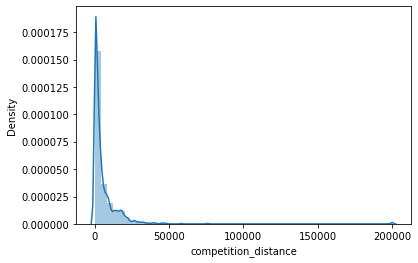

In [42]:
#Visualizing the distribuition of a given column

sns.distplot(df1['competition_distance'])

## 1.7.2 Categorical Atrtributes

In [43]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

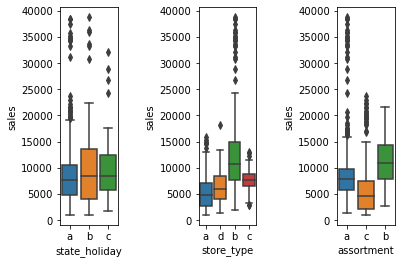

In [52]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot(1, 5, 1)
sns.boxplot(x= 'state_holiday', y= 'sales', data=aux1)

plt.subplot(1, 5, 3)
sns.boxplot(x= 'store_type', y= 'sales', data=aux1)

plt.subplot(1, 5, 5)
sns.boxplot(x= 'assortment', y= 'sales', data=aux1)